In [66]:
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import csv
import matplotlib.pyplot as plt

In [67]:
def getUnemployementPath():
    cwd = Path.cwd()
    parent = cwd.parent
    unemployement_csv_path = parent.joinpath("data/unzipped/unemployement/23157061427896605_data.tsv")
    return unemployement_csv_path


In [68]:
def loadingAndPreProcessing() -> pd.DataFrame:
    path = getUnemployementPath()
    df = pd.read_csv(path, delimiter='\t')
    del df["Age"]
    del df["value type"]
    del df["flag"]
    df["date"] = pd.to_datetime(df["date"])
    return df

df = loadingAndPreProcessing()

# Process the DataFrame as needed


In [98]:
# df[df["geogcode"]=="Column Total"]
df[df["measure"] == "Claimants as a proportion of residents aged 16-64"]

Gender                                            measure  \
2728    Total  Claimants as a proportion of residents aged 16-64   
2729    Total  Claimants as a proportion of residents aged 16-64   
2730    Total  Claimants as a proportion of residents aged 16-64   
2731    Total  Claimants as a proportion of residents aged 16-64   
2732    Total  Claimants as a proportion of residents aged 16-64   
...       ...                                                ...   
16363  Female  Claimants as a proportion of residents aged 16-64   
16364  Female  Claimants as a proportion of residents aged 16-64   
16365  Female  Claimants as a proportion of residents aged 16-64   
16366  Female  Claimants as a proportion of residents aged 16-64   
16367  Female  Claimants as a proportion of residents aged 16-64   

           geogcode       date  value  
2728      E05000043 2013-01-01    2.4  
2729      E05000043 2013-02-01    2.5  
2730      E05000043 2013-03-01    2.4  
2731      E05000043 2013-04-01    2.2  
2732      E05000043 2013-05-01    2.2  
...             ...        ...    ...  
16363  Column Total 2022-12-01    3.9  
16364  Column Total 2023-01-01    NaN  
16365  Column Total 2023-02-01    NaN  
16366  Column Total 2023-03-01    NaN  
16367  Column Total 2023-04-01    NaN  

[8184 rows x 5 columns]

In [96]:
df["measure"].unique()

array(['Claimant count',
       'Claimants as a proportion of residents aged 16-64'], dtype=object)

/tmp/ipykernel_14341/2842856302.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["pct change"] = temp["value"].pct_change() *100;
/tmp/ipykernel_14341/2842856302.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["pct change"] = temp["value"].pct_change() *100;
/tmp/ipykernel_14341/2842856302.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

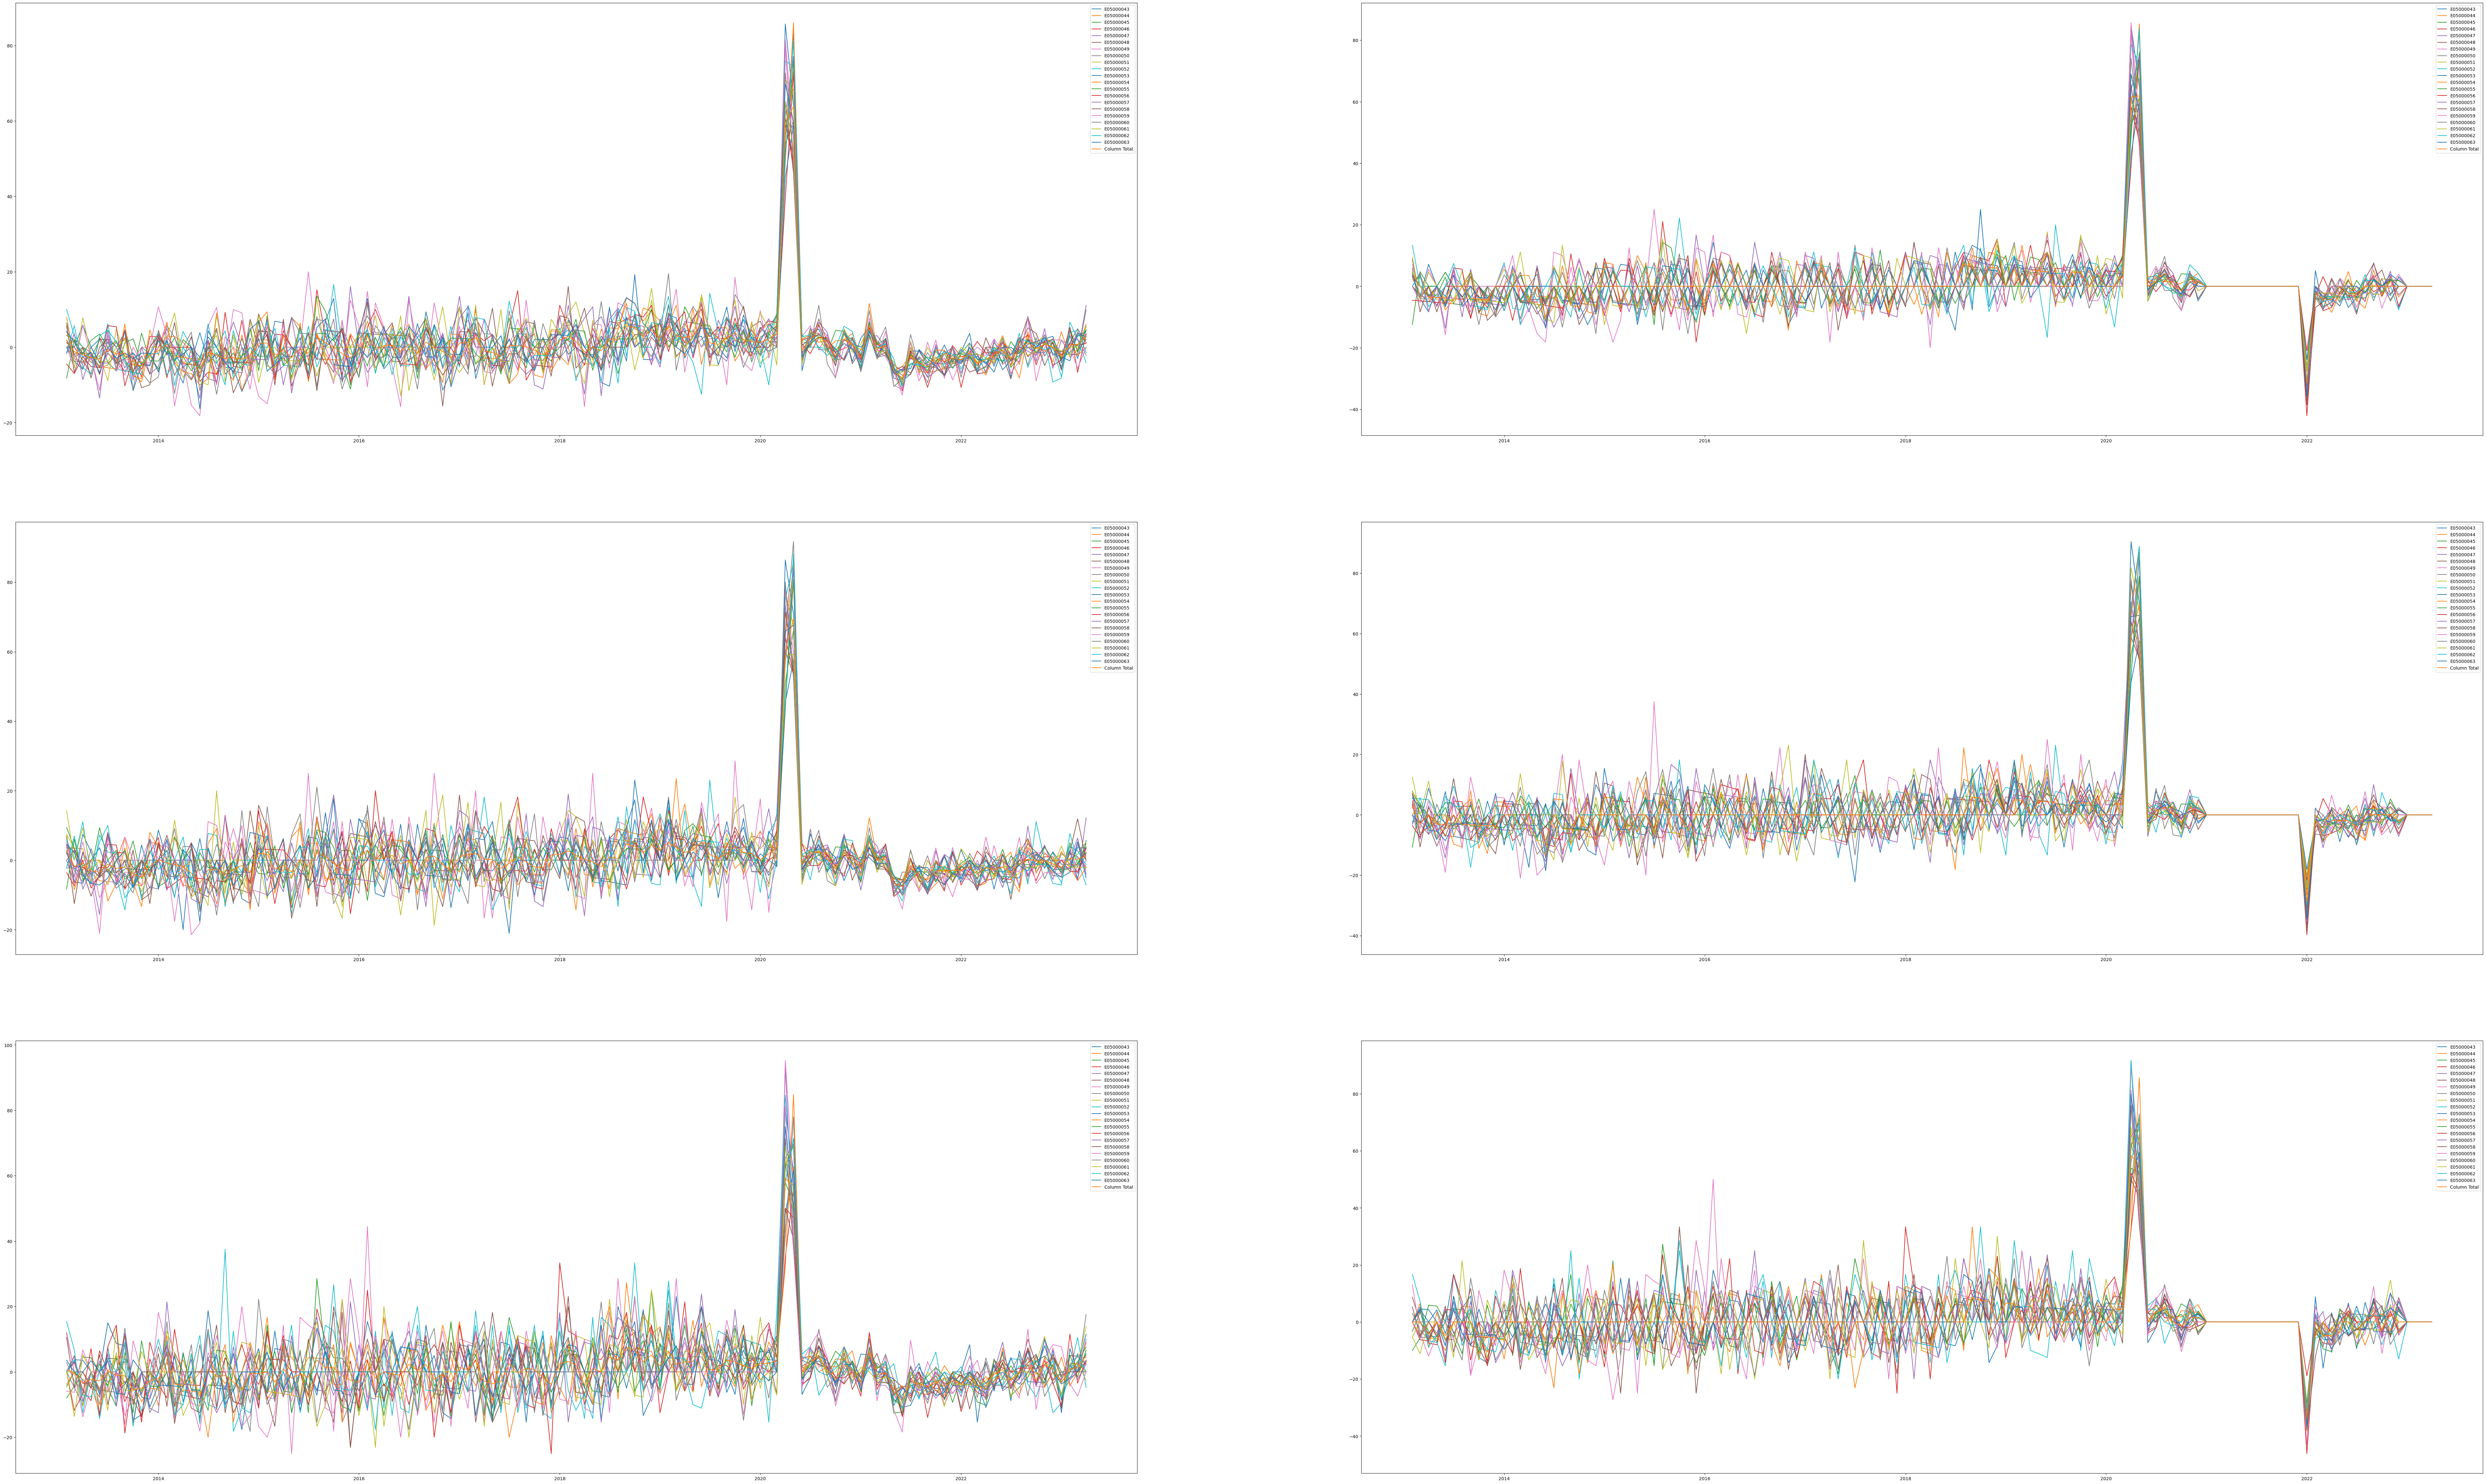

In [102]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (100,60))
for sex in df["Gender"].unique():
    for measure in df["measure"].unique():
        for geocode in df["geogcode"].unique():
            temp = df[(df["Gender"] == sex) & (df["measure"] == measure) & (df["geogcode"] == geocode)]
            temp.set_index("date", inplace=True)
            temp["pct change"] = temp["value"].pct_change() *100;
            temp = temp[1:]
            if measure == "Claimant count":
                col = 0
            else:
                col = 1

            if sex == "Total":
                row = 0
            elif sex == "Male":
                row = 1
            else:
                row = 2

            ax[row, col].plot(temp.index, temp["pct change"], label=geocode);

ax[0, 0].legend()
ax[1, 0].legend()
ax[2, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()
fig.savefig("/home/maxwell/Documents/Y2/DC2/data/img/unemployement.png")